<a href="https://colab.research.google.com/github/Vimalqub/Vimalqub.github.io/blob/main/Feature_Order_Profit_Per_Order_Models_for_supply_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Supply chain forecasting-sales prediction***

**Dataset** :  DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS

Dataset link : https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

**Machine Learning and Statistical models for supply chain**

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"anaghajain","key":"41134df6e187b69407045397ccf1fce0"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          20711        578  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           1919         49  1.0              
darshanprabhu09/stock-prices-for                          Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16            861         26  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset             

In [ ]:
!kaggle datasets download -d shashwatwork/dataco-smart-supply-chain-for-big-data-analysis


dataco-smart-supply-chain-for-big-data-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip dataco-smart-supply-chain-for-big-data-analysis

Archive:  dataco-smart-supply-chain-for-big-data-analysis.zip
replace DataCoSupplyChainDataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [ ]:

df=pd.read_csv("DataCoSupplyChainDataset.csv", encoding_errors="ignore")
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
# Handling missing values
# Handling data types
# Handling categorical variables
# Handling outliers


In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
df.drop(["Customer Email","Customer Password","Product Image","Customer Fname","Customer Fname"],axis=1,inplace=True)

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df['Order Zipcode'].fillna(0, inplace=True)
df['Product Description'].fillna(0, inplace=True)

In [ ]:
df.rename(columns={"Type":"Type Of Payments"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type Of Payments               180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Lname                

Sales per year,month and day date

In [ ]:
df['year'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[-1].split(' ')[0])

In [ ]:
df['month'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[0].split(' ')[0])

In [ ]:
df['day date'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[1].split(' ')[0])

**Data Modeling**

Encoding label

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

Forcasting sales of different product

In [ ]:
data_sales=df[['Type Of Payments','Benefit per order', 'Sales per customer', 'Delivery Status','Late_delivery_risk', 
             'Category Name', 'Customer City','Customer Country','Customer Id','Customer Segment',
             'Customer State', 'Customer Zipcode','Department Name', 'Latitude', 'Longitude', 'Market',
             'Order City', 'Order Country', 'Order Customer Id','order date (DateOrders)', 'Order Id', 
             'Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
             'Order Item Product Price', 'Order Item Profit Ratio','Order Item Quantity', 'Sales', 
             'Order Item Total','Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
             'Order Zipcode', 'Product Card Id', 'Product Category Id','Product Description', 
             'Product Name', 'Product Price','Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]

In [ ]:
features=data_sales.drop(columns=['Order Profit Per Order'])
target=data_sales['Order Profit Per Order'].astype(str)

In [ ]:
features=features.apply(Labelencoder_feature)
features.head()

,Type Of Payments,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,18934,2568,0,0,40,66,1,20649,0,...,2,0,114,47,0,78,62,0,27149,3
1,3,2272,2559,1,1,40,66,1,19386,0,...,5,0,114,47,0,78,62,0,2209,3
2,0,2293,2555,3,0,40,452,0,19385,0,...,1,0,114,47,0,78,62,0,1980,3
3,1,13638,2546,0,0,40,285,0,19384,2,...,2,0,114,47,0,78,62,0,1752,3
4,2,20599,2526,0,0,40,66,1,19383,1,...,6,0,114,47,0,78,62,0,1528,3


In [ ]:
final_features=features[['Benefit per order', 'Sales per customer', 'Category Name', 'Sales', 
                         'Order Item Quantity', 'Order Item Product Price', 
                         'Customer Id', 'Customer Segment', 'Department Name', 
                         'Market', 'Order City', 'Order Customer Id', 
                         'order date (DateOrders)', 'Order Id', 
                         'Order Item Cardprod Id', 'Order Item Discount',
                         'Order Item Id', 'Order Item Total',
                         'Order Region', 'Order State', 'Order Zipcode', 'Product Card Id',
                         'Product Category Id', 'Product Name', 'Product Price',
                         'shipping date (DateOrders)']]

In [ ]:
final_features

,Benefit per order,Sales per customer,Category Name,Sales,Order Item Quantity,Order Item Product Price,Customer Id,Customer Segment,Department Name,Market,...,Order Item Id,Order Item Total,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders)
0,18934,2568,40,166,0,62,20649,0,4,3,...,180516,2568,15,475,0,114,47,78,62,27149
1,2272,2559,40,166,0,62,19386,0,4,3,...,179253,2559,13,841,0,114,47,78,62,2209
2,2293,2555,40,166,0,62,19385,0,4,3,...,179252,2555,13,841,0,114,47,78,62,1980
3,13638,2546,40,166,0,62,19384,2,4,3,...,179251,2546,11,835,0,114,47,78,62,1752
4,20599,2526,40,166,0,62,19383,1,4,3,...,179250,2526,11,835,0,114,47,78,62,1528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,15208,2752,18,177,0,66,992,2,3,3,...,65176,2752,7,914,0,96,30,24,66,2733
180515,422,2743,18,177,0,66,9066,1,3,3,...,65160,2743,7,770,0,96,30,24,66,2339
180516,20768,2734,18,177,0,66,288,1,3,3,...,65128,2734,11,88,0,96,30,24,66,2727
180517,21463,2725,18,177,0,66,2781,0,3,3,...,65125,2725,11,88,0,96,30,24,66,2114


In [ ]:
final_data=pd.concat([final_features,target],axis=1)
final_data.columns

Index(['Benefit per order', 'Sales per customer', 'Category Name', 'Sales',
       'Order Item Quantity', 'Order Item Product Price', 'Customer Id',
       'Customer Segment', 'Department Name', 'Market', 'Order City',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Id',
       'Order Item Total', 'Order Region', 'Order State', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)',
       'Order Profit Per Order'],
      dtype='object')

<Axes: >

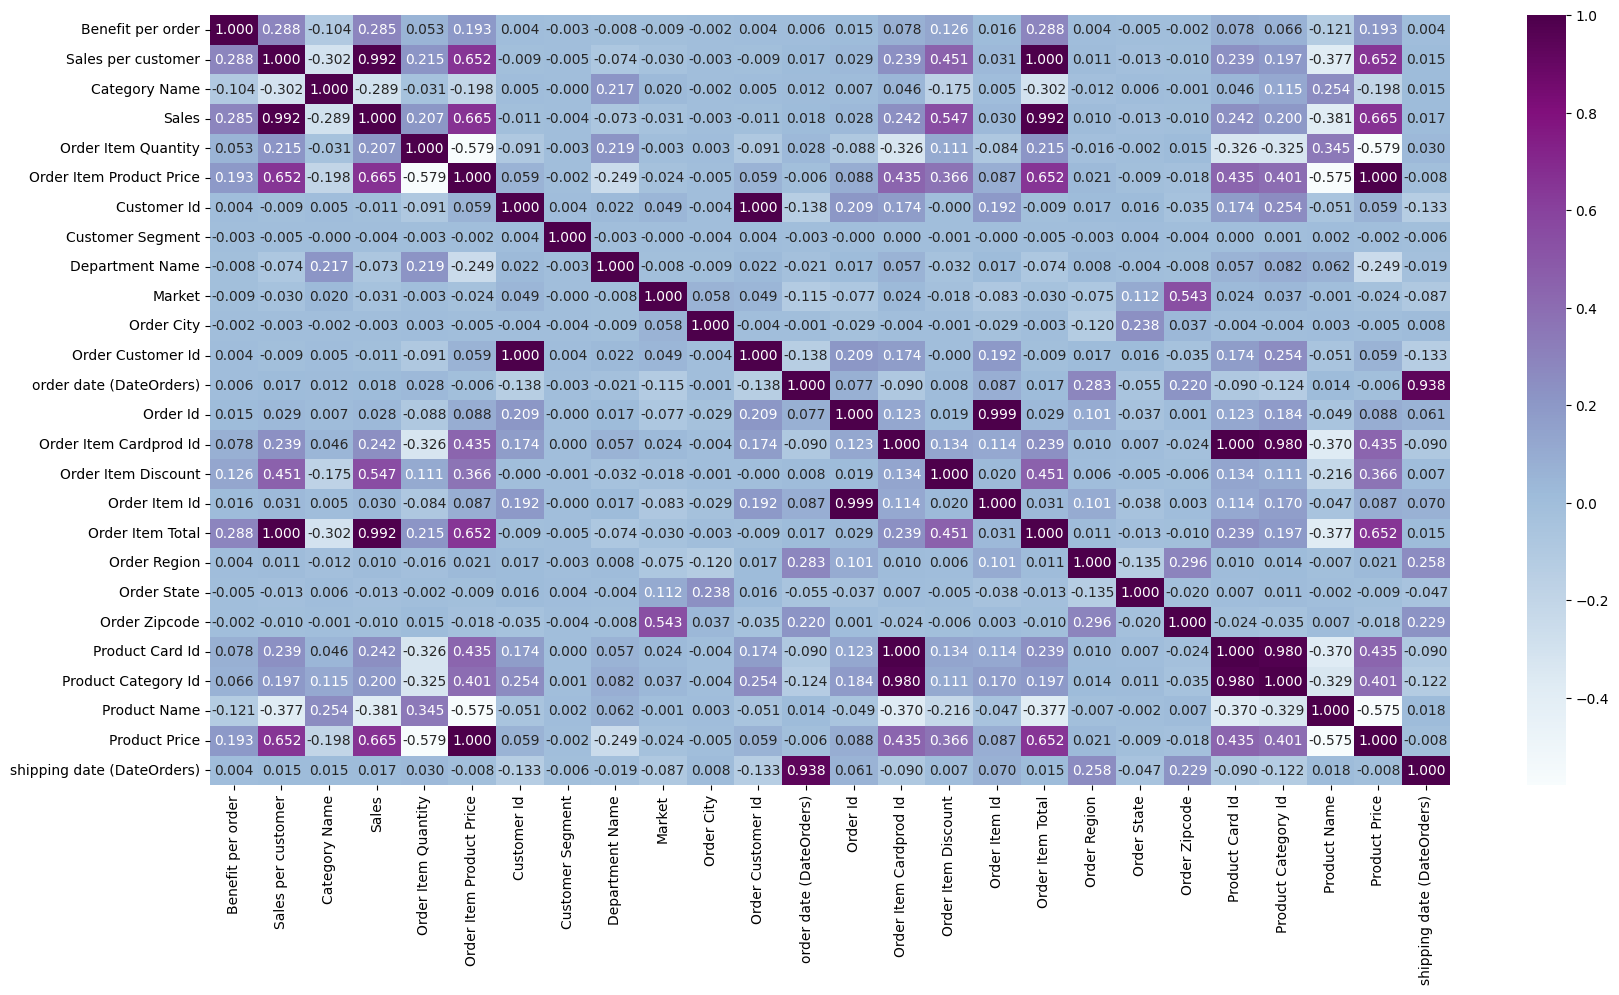

In [ ]:
import matplotlib. pyplot as plt 
import seaborn as sns
fig=plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(),annot=True,fmt=".3f",cmap="BuPu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
import pickle

***Linear Regression model***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

X_train
y_train

1654       91.19999695
25587      44.63000107
5476       20.57999992
22881      12.44999981
67455      25.92000008
              ...     
18505     -83.22000122
105215     38.52000046
1650       63.04999924
99687      21.67000008
89241      46.79999924
Name: Order Profit Per Order, Length: 126363, dtype: object

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model object
linReg = LinearRegression()

# Fit the model to the training data
linReg.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = linReg.predict(X_test)

In [ ]:
ln_score=r2_score(y_test,y_pred)
print("r2 score is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.7673294654562433
mean_sqrd_error is 2484.9448313381054
root_mean_squared error of is 49.849220970222845


In [ ]:
lin_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : linReg.predict(X_train)})
lin_train_predict.head(10)

,actual,predicted
24287,64.26999664,75.785303
145678,195.9900055,153.822797
34434,10.51000023,1.765443
38436,214.8099976,158.877975
40885,24.37000084,34.027229
70142,-36.74000168,-110.608038
162631,17.3199997,32.759561
12217,132.9900055,131.825587
179670,129.3500061,132.328402
125257,4.389999866,6.772057


***Lasso***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
lasReg=Lasso()
lasmodel=lasReg.fit(X_train,y_train)

In [ ]:
y_prediction =lasReg.predict(X_test)
y_prediction

array([-192.65210963,  148.3842209 ,   45.93145546, ...,   35.68642447,
       -126.70442188, -126.75671908])

In [ ]:
ls_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,ls_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.7344968202654879
mean_sqrd_error is 2965.368236900096
root_mean_squared error of is 54.455194765055204


Ridge regression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
ridReg=Ridge()
ridmodel=ridReg.fit(X_train,y_train)

In [ ]:
y_prediction =ridReg.predict(X_test)
y_prediction

array([  91.77702993,  138.05035351,  129.27920577, ..., -123.33983788,
          6.66134903,   43.97337528])

In [ ]:
rd_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,rd_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.7460546883775646
mean_sqrd_error is 2822.258853887436
root_mean_squared error of is 53.12493627184353


***KNN***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
knncls=KNeighborsClassifier(n_neighbors=7)
knncls.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_prediction =knncls.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
knn_score=r2_score(y_test,y_prediction)
print("r2 score is:" ,knn_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

r2 score is: 0.7516216067134796
mean_sqrd_error is 2647.0137889551784
root_mean_squared error of is 51.4491378834979
Accuracy: 0.0013110274023192259


***Naive bayes***

In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
# sc=StandardScaler() 

In [ ]:
# x_scaler=sc.fit_transform(final_features)

In [ ]:
# pipe=Pipeline(steps=[("sc",sc),("Guaasinnb", GaussianNB())])

In [ ]:
# pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('Guaasinnb', GaussianNB())])

In [ ]:
# gu_Score=pipe.score(X_test, y_test)
# gu_Score

***SVM***

In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# model = SVC(kernel='linear', C=1, gamma='auto')

# # Train the SVM model on the training set
# model.fit(X_train, y_train)

# # Predict the classes of the test set
# y_pred = model.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)

# # Print the accuracy score
# print("Accuracy:", accuracy)

In [ ]:
# svc_score=r2_score(y_test,y_pred)
# print("r2 score is:" ,svc_score)
# print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
# print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

**GRADIENT BOOST**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Fit Gradient Boosting Regression model
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
gbr.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = gbr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 10.815297850995464


In [ ]:
gb_score=r2_score(y_test,y_pred)
print("r2 score is:" ,gb_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.9990156284972299
mean_sqrd_error is 10.815297850995464
root_mean_squared error of is 3.2886620153180024


***Decison tree***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regressor object
dt = DecisionTreeRegressor()

# Train the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)

Mean Squared Error:  5.450075684145498


In [ ]:
dt_score=r2_score(y_test,y_pred)
print("r2 score is:" ,dt_score)
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.9995123644905753
root_mean_squared error of is 2.334539715692474


***Random Forest***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# create random forest regressor model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# fit model to training data
rf.fit(X_train, y_train)

# make predictions on test data
y_pred = rf.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.247220930139266


In [ ]:
rf_score=r2_score(y_test,y_pred)
print("r2 score is:" ,rf_score)
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.9992619660828527
root_mean_squared error of is 2.871797508554401


***LSTM***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_data)

# Split the data into features and target
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)



Epoch 1/10
4513/4513 [==============================] - 29s 5ms/step - loss: 0.0034
Epoch 2/10
4513/4513 [==============================] - 25s 6ms/step - loss: 9.8644e-05
Epoch 3/10
4513/4513 [==============================] - 23s 5ms/step - loss: 7.5264e-05
Epoch 4/10
4513/4513 [==============================] - 23s 5ms/step - loss: 6.2911e-05
Epoch 5/10
4513/4513 [==============================] - 23s 5ms/step - loss: 4.5272e-05
Epoch 6/10
4513/4513 [==============================] - 22s 5ms/step - loss: 3.1867e-05
Epoch 7/10
4513/4513 [==============================] - 23s 5ms/step - loss: 2.7912e-05
Epoch 8/10
4513/4513 [==============================] - 23s 5ms/step - loss: 2.4690e-05
Epoch 9/10
4513/4513 [==============================] - 23s 5ms/step - loss: 2.3446e-05
Epoch 10/10
1129/1129 [==============================] - 4s 2ms/step
Mean Squared Error:  7.356639606684915e-06
R2 Score:  0.9807470623446046


***GRU***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout



# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_data)

# Split the data into features and target
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the GRU model
model = Sequential()
model.add(GRU(128, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)


Epoch 1/20
4513/4513 [==============================] - 33s 6ms/step - loss: 0.0015
Epoch 2/20
4513/4513 [==============================] - 24s 5ms/step - loss: 9.9819e-05
Epoch 3/20
4513/4513 [==============================] - 24s 5ms/step - loss: 8.5406e-05
Epoch 4/20
4513/4513 [==============================] - 24s 5ms/step - loss: 6.3355e-05
Epoch 5/20
4513/4513 [==============================] - 25s 5ms/step - loss: 5.7449e-05
Epoch 6/20
4513/4513 [==============================] - 24s 5ms/step - loss: 5.2362e-05
Epoch 7/20
4513/4513 [==============================] - 26s 6ms/step - loss: 4.9685e-05
Epoch 8/20
4513/4513 [==============================] - 24s 5ms/step - loss: 4.7520e-05
Epoch 9/20
4513/4513 [==============================] - 24s 5ms/step - loss: 4.7346e-05
Epoch 10/20
4513/4513 [==============================] - 23s 5ms/step - loss: 4.1479e-05
Epoch 11/20
4513/4513 [==============================] - 24s 5ms/step - loss: 4.5133e-05
Epoch 12/20
4513/4513 [===========

***Multilayer Perceptron model***

In [ ]:
from sklearn.neural_network import MLPRegressor

# Multilayer Perceptron model
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.2)

mlpReg = MLPRegressor(hidden_layer_sizes=(100,50,), activation='relu', solver='adam', max_iter=2000)
mlpmodel = mlpReg.fit(X_train, y_train)

y_prediction = mlpReg.predict(X_test)

mlp_score = r2_score(y_test, y_prediction)
print("r2 score is:", mlp_score)
print("mean squared error is:", mean_squared_error(y_test, y_prediction))
print("root mean squared error is:", np.sqrt(mean_squared_error(y_test, y_prediction)))


r2 score is: 0.8917740312157135
mean squared error is: 1186.171308053131
root mean squared error is: 34.4408377954592


***Ordinary Least Squares (OLS)***

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Convert Sales column to float type
final_data['Sales'] = final_data['Sales'].astype(float)
y = final_data['Sales']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(final_features,y,test_size=0.2)

# Add constant to the features matrix
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create the OLS model
model = sm.OLS(y_train, X_train)

# Fit the OLS model
results = model.fit()

# Make predictions on the testing set
y_prediction = results.predict(X_test)

# Calculate evaluation metrics
r2_score = r2_score(y_test, y_prediction)
mean_squared_error = mean_squared_error(y_test, y_prediction)
root_mean_squared_error = np.sqrt(mean_squared_error)

# Print the summary statistics and evaluation metrics of the model
# print(results.summary())
print("r2 score is:", r2_score)
print("mean squared error is:", mean_squared_error)
print("root mean squared error is:", root_mean_squared_error)


r2 score is: 1.0
mean squared error is: 1.7662770623958784e-24
root mean squared error is: 1.329013567423553e-12


***Kruskal-Wallis test***

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X = final_data['Product Price'].values.reshape(-1, 1)
y = final_data['Order Profit Per Order'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print('R2 score:', r2)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)

R2 score: 0.007692690278288117
Mean squared error: 10605.427275269472
Root mean squared error: 102.98265521566955


***T-test***

In [ ]:
final_data['Order Profit Per Order'] = pd.to_numeric(final_data['Order Profit Per Order'])

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data[['Order Profit Per Order', 'Product Price']], final_data['Order Profit Per Order'], test_size=0.2, random_state=42)

# Perform T-test
t_test = stats.ttest_ind(X_train['Order Profit Per Order'], X_train['Product Price'])

# Fit linear regression model to training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate r2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Display T-test result, r2 score, mean squared error, and root mean squared error
print('T-test:', t_test)
print('r2 score:', r2)
print('mean squared error:', mse)
print('root mean squared error:', rmse)
print('Actual vs predicted values:')


T-test: Ttest_indResult(statistic=-50.724957611575974, pvalue=0.0)
r2 score: 1.0
mean squared error: 2.1152622209858708e-27
root mean squared error: 4.59919799637488e-14
Actual vs predicted values:


***Chi-square test***

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import classification_report, accuracy_score


# Create cross-tabulation table of Sales and Product Price
observed = pd.crosstab(final_data['Order Profit Per Order'], final_data['Product Price'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Display chi-square test results
print('Chi-Square test statistic:', chi2)
print('p-value:', p_value)
print('Degrees of freedom:', dof)

# Predict Sales using Product Price as a feature
y_true = final_data['Order Profit Per Order']
y_pred = final_data['Product Price'] > final_data['Product Price'].mean()

# Convert y_true into binary values
threshold = final_data['Order Profit Per Order'].mean()
y_true = (y_true > threshold).astype(int)

# Compute classification report and accuracy score
report = classification_report(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Display performance evaluation metrics
print('Classification report:')
print(report)
print('Accuracy score:', accuracy)


Chi-Square test statistic: 4886817.441628419
p-value: 0.0
Degrees of freedom: 1627778
Classification report:
              precision    recall  f1-score   support

           0       0.49      0.68      0.57     75070
           1       0.68      0.49      0.57    105449

    accuracy                           0.57    180519
   macro avg       0.58      0.58      0.57    180519
weighted avg       0.60      0.57      0.57    180519

Accuracy score: 0.5687268376182009
